# Airline Passenger Satisfaction Prediction

### -This machine learning project seeks to predict airline service satisfaction by analyzing historical data on passenger experiences. 
### -It involves data preprocessing, model development, and evaluation, aiming to provide airlines with a predictive model to enhance service quality, improve customer satisfaction, and remain competitive. 
### -The project's outcome includes an accurate predictive model and insights into key factors influencing satisfaction, which can lead to data-driven service improvements and increased customer loyalty.

## Column info:
### It has 24 columns.
#### 1.Gender: Gender of the passengers (Female, Male)
#### 2.Customer Type: The customer type (Loyal customer, Disloyal customer)
#### 3.Age: The actual age of the passengers
#### 4.Type of Travel: Purpose of travel of passengers (Personal Travel, Business Travel)
#### 5.Class: Travel class in the plane of the passengers (Business, Economy)
#### 6.Flight distance: The flight distance of this journey
#### 7.Ease of Online booking: Satisfaction level of online booking
#### 8.Gate location: Satisfaction level of Gate location
#### 9.Food and drink: Satisfaction level of Food and drink
#### 10.Online boarding: Satisfaction level of online boarding
#### 11.Seat comfort: Satisfaction level of Seat comfort
#### 12.Inflight entertainment: Satisfaction level of inflight entertainment
#### 13.Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenience.
#### 14.On-board service: Satisfaction level of On-board service
#### 15.Legroom service: Satisfaction level of Leg room service
#### 16.Baggage handling: Satisfaction level of baggage handling
#### 17.Check-in service: Satisfaction level of Check-in service
#### 18.Inflight service: Satisfaction level of inflight service
#### 19.Cleanliness: Satisfaction level of Cleanliness.
#### 20.Departure Delay in Minutes: Minutes delayed when departed
#### 21.Arrival Delay in Minutes: Minutes delayed when Arrived
#### 22.Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)
#### 23.Cleanliness: Satisfaction level of Cleanliness.
#### 24.Unnamed: The index column

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

import warnings
warnings.filterwarnings('ignore')#ignores warning

## **Importing the Dataset** 

In [3]:
# 1.displaying top 5 and bottom 5 rows from dataset and getting actual shape(rows,columns) of dataset
df=pd.read_csv('/home/gaurav_8412/ML/project_final/airline.csv')
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3,5,5,4.0,3.0,4,4,5,5.0,25.0,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25.0,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3,1,1,1.0,5.0,3,1,4,1.0,1.0,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26.0,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5,5,5,4.0,3.0,4,4,4,5.0,0.0,0.0,satisfied
3,3,Female,Loyal Customer,25.0,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2,2,2,2.0,5.0,3,1,4,2.0,11.0,9.0,neutral or dissatisfied
4,4,Male,NaN,61.0,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5,5,3,3.0,4.0,4,3,3,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129926,129926,Female,Loyal Customer,49.0,Business travel,Eco,794,4.0,2.0,2.0,2.0,1.0,1,2,5,5.0,4.0,5,4,5,1.0,0.0,0.0,satisfied
129927,129927,Female,disloyal Customer,36.0,NaN,Eco,101,3.0,0.0,3.0,4.0,2.0,3,2,2,4.0,2.0,5,4,4,2.0,1.0,0.0,neutral or dissatisfied
129928,129928,Female,Loyal Customer,22.0,Business travel,Business,1837,2.0,2.0,2.0,2.0,3.0,4,3,3,5.0,5.0,4,3,4,3.0,0.0,13.0,satisfied
129929,129929,Male,Loyal Customer,30.0,Personal Travel,Eco Plus,28385,4.0,5.0,4.0,3.0,2.0,4,2,2,3.0,3.0,3,5,4,2.0,0.0,0.0,neutral or dissatisfied


In [4]:
# 2.Get Information About Our Dataset like Total Number of Rows,Columns,Datatypes and total Non-Null values in respective columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129931 entries, 0 to 129930
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129931 non-null  int64  
 1   Gender                             127403 non-null  object 
 2   customer_type                      127471 non-null  object 
 3   age                                127455 non-null  float64
 4   type_of_travel                     127484 non-null  object 
 5   customer_class                     129931 non-null  object 
 6   flight_distance                    129931 non-null  int64  
 7   inflight_wifi_service              128953 non-null  float64
 8   departure_arrival_time_convenient  128935 non-null  float64
 9   ease_of_online_booking             128908 non-null  float64
 10  gate_location                      128928 non-null  float64
 11  food_and_drink                     1289

In [5]:
# 3.Check Overall Statistics About the Dataset
df.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129931.00000,127455.000000,129931.000000,128953.000000,128935.000000,128908.000000,128928.000000,128951.000000,129931.000000,129931.000000,129931.000000,129418.000000,129445.00000,129931.000000,129931.000000,129931.000000,126162.000000,126250.000000,125815.000000
mean,64965.00000,39.424362,1635.026853,2.728343,3.057641,2.757478,2.976289,3.204264,3.252657,3.441311,3.358082,3.383084,3.35113,3.632189,3.306301,3.642295,3.286877,14.701426,15.115972
std,37507.99325,15.116155,3383.498709,1.329106,1.526950,1.401720,1.278425,1.330064,1.350696,1.319368,1.334047,1.287069,1.31627,1.179999,1.266133,1.176634,1.313375,38.006527,38.416153
min,0.00000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32482.50000,27.000000,419.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64965.00000,40.000000,861.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97447.50000,51.000000,1815.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129930.00000,85.000000,29997.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# 4.Check Null Values In the Dataset
df.isna().sum()

Unnamed: 0                              0
Gender                               2528
customer_type                        2460
age                                  2476
type_of_travel                       2447
customer_class                          0
flight_distance                         0
inflight_wifi_service                 978
departure_arrival_time_convenient     996
ease_of_online_booking               1023
gate_location                        1003
food_and_drink                        980
online_boarding                         0
seat_comfort                            0
inflight_entertainment                  0
onboard_service                       513
leg_room_service                      486
baggage_handling                        0
checkin_service                         0
inflight_service                        0
cleanliness                          3769
departure_delay_in_minutes           3681
arrival_delay_in_minutes             4116
satisfaction                      

# **Data Cleaning** 

In [7]:
# 5.'Satisfaction' is dependent column having already some missing values so dropping all rows having missing values in 'Satisfaction' column
# As in Supervised ML the model gets trained and evaluation is done based on already known dependent column value 
df.dropna(subset=['satisfaction'],inplace=True)
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [8]:
# 6.removing the index column as this column is having only row numbers in it
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
# 7.finding out all Texual columns with count of their unique values
texual_columns = df.select_dtypes(include=['object'])
unique_val = texual_columns.nunique(dropna=False)
print(unique_val)

Gender            3
customer_type     3
type_of_travel    3
customer_class    3
satisfaction      2
dtype: int64


In [10]:
# 8.impution of all 'Na' values from texual column with Mode of respective texual column
for val in texual_columns:
    if df[val].isna().sum()>0:
        df[val]=df[val].fillna(df[val].mode()[0])

In [11]:
# 9.Encoding the texual column values with Simple Encoder
label_encoder = LabelEncoder()
for val in texual_columns:
    print(df[val].unique())
    df[val]= label_encoder.fit_transform(df[val])
    print(df[val].unique())

['Male' 'Female']
[1 0]
['Loyal Customer' 'disloyal Customer']
[0 1]
['Personal Travel' 'Business travel']
[1 0]
['Eco Plus' 'Business' 'Eco']
[2 0 1]
['neutral or dissatisfied' 'satisfied']
[0 1]


In [12]:
# 10. There are 2 categories as 'Eco' and 'Eco Plus' in customer class column
# majorly Airline provides only two classes named as 'Business class' and 'Economy class'
# So, Eco(1- encoded value) and Eco Plus(2- encoded value) categoried as a single category as 'Eco'
df['customer_class'] = df['customer_class'].replace({2:1})
df['customer_class'].unique()

array([1, 0])

In [13]:
# 11.Checking datatypes of all the columns
# Now there is no column present with 'Object' (Containing Texual values) datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126311 entries, 0 to 129930
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             126311 non-null  int64  
 1   customer_type                      126311 non-null  int64  
 2   age                                123902 non-null  float64
 3   type_of_travel                     126311 non-null  int64  
 4   customer_class                     126311 non-null  int64  
 5   flight_distance                    126311 non-null  int64  
 6   inflight_wifi_service              125366 non-null  float64
 7   departure_arrival_time_convenient  125350 non-null  float64
 8   ease_of_online_booking             125309 non-null  float64
 9   gate_location                      125337 non-null  float64
 10  food_and_drink                     125358 non-null  float64
 11  online_boarding                    126311 no

In [14]:
# 12.Checking the shape of the dataframe
df.shape

(126311, 23)

In [15]:
# 13.Removal of Duplicate Rows from dataframe
df.drop_duplicates(inplace=True)

In [16]:
# 14.Checking the shape of the dataframe after the removel of duplicate rows
df.shape

(126260, 23)

In [17]:
# 15.Check Null Values In the Dataset
df.isnull().sum()

Gender                                  0
customer_type                           0
age                                  2409
type_of_travel                          0
customer_class                          0
flight_distance                         0
inflight_wifi_service                 945
departure_arrival_time_convenient     961
ease_of_online_booking               1002
gate_location                         973
food_and_drink                        953
online_boarding                         0
seat_comfort                            0
inflight_entertainment                  0
onboard_service                       498
leg_room_service                      468
baggage_handling                        0
checkin_service                         0
inflight_service                        0
cleanliness                          3661
departure_delay_in_minutes           3577
arrival_delay_in_minutes             3996
satisfaction                            0
dtype: int64

<Axes: >

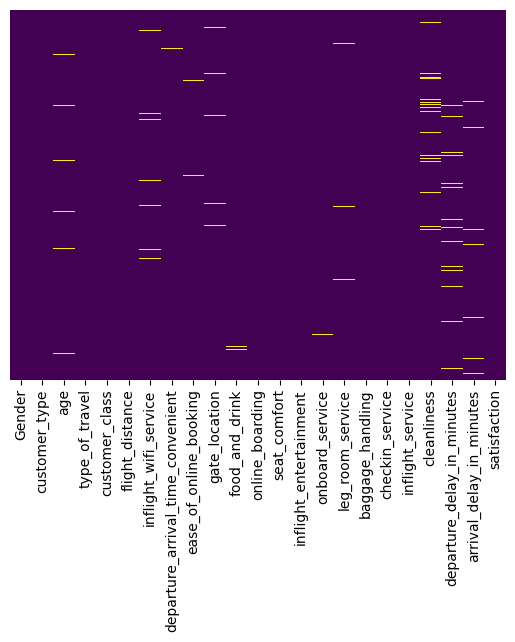

In [18]:
# 16.VISUALISING THE MISSING VALUES WITH HEATMAP
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='age', ylabel='Count'>

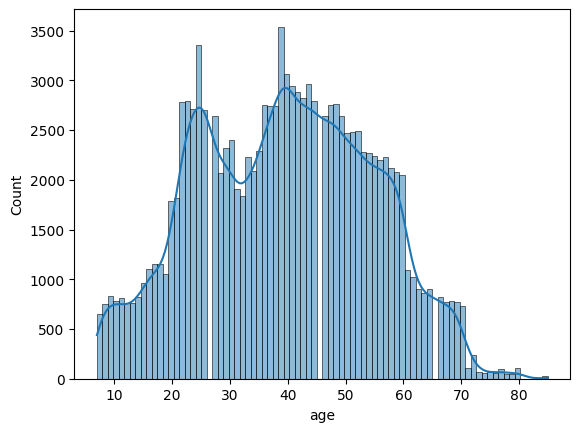

In [19]:
# 17.Plotting Histogram for 'age' column having discrete Numeric values
sns.histplot(data = df['age'], kde = True)

In [20]:
# as the histogram for 'age' column is close to normally distributed so replacing 'Na' values with mean
df['age']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='arrival_delay_in_minutes', ylabel='Density'>

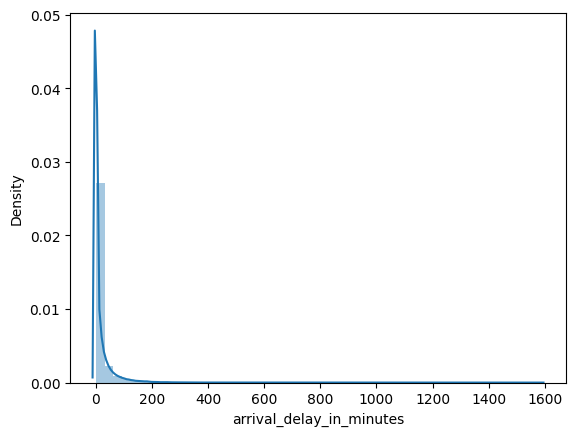

In [21]:
# 18.Plotting Histogram for 'arrival_delay_in_minutes' column having discrete Numeric values
# The plot has Right skewed distribution
sns.distplot(df['arrival_delay_in_minutes'])

<Axes: xlabel='departure_delay_in_minutes', ylabel='Density'>

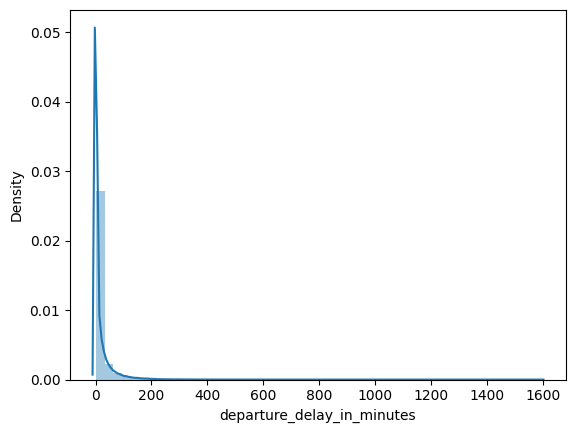

In [22]:
# 19.Plotting Histogram for 'departure_delay_in_minutes' column having discrete Numeric values
# The plot has Right skewed distribution
sns.distplot(df['departure_delay_in_minutes'])

In [23]:
# 20.As the Histogram for both 'departure_delay_in_minutes' and 'arrival_delay_in_minutes' are nearly same
# So checking the correlation value between them
# From value of correlation can infer that they are correlated columns- One needs to be dropped
df['departure_delay_in_minutes'].corr(df['arrival_delay_in_minutes'])


0.9644200874192869

In [24]:
# 21.Getting all Columns having null values and their count and total no. of unique values in repective column 
a='Column Name'
b='Null Values'
c='Unique Values'

print(f"{a:<40}|{b:^15}|{c:^15}")
print('-'*70)
for val in df.columns:
    if df[val].isna().sum()>0:
        print(f"{val:<40}|{df[val].isna().sum():^15}|{df[val].nunique():^15}")
print('-'*70)

Column Name                             |  Null Values  | Unique Values 
----------------------------------------------------------------------
inflight_wifi_service                   |      945      |       6       
departure_arrival_time_convenient       |      961      |       6       
ease_of_online_booking                  |     1002      |       6       
gate_location                           |      973      |       6       
food_and_drink                          |      953      |       6       
onboard_service                         |      498      |       6       
leg_room_service                        |      468      |       6       
cleanliness                             |     3661      |       6       
departure_delay_in_minutes              |     3577      |      454      
arrival_delay_in_minutes                |     3996      |      462      
----------------------------------------------------------------------


In [25]:
# 22.Imputing corrosponding values for all Null values-
# for categorical columns, we are imputing mode of all values
# for numeric columns, we are imputing median of all values as data distribution is right skewed 
for val in df.columns:
    if df[val].isna().sum()==6:
        df[val]=df[val].fillna(df[val].mode()[0])
    else:
        df[val]=df[val].fillna(df[val].median())

In [26]:
# 23.Checking NUll value count for all columns
df.isna().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [27]:
# Categorising column as 'Categorical' or 'Discrete Numeric'
a=[]
for val in df.columns:
    if df[val].nunique()>10:
        print(f"{val:<40}|{df[val].nunique():^15}|{'Discrete Numeric':^20}")
        a.append(val)
    else:
        print(f"{val:<40}|{df[val].nunique():^15}|{'Categorical':^20}")

Gender                                  |       2       |    Categorical     
customer_type                           |       2       |    Categorical     
age                                     |      76       |  Discrete Numeric  
type_of_travel                          |       2       |    Categorical     
customer_class                          |       2       |    Categorical     
flight_distance                         |     5956      |  Discrete Numeric  
inflight_wifi_service                   |       6       |    Categorical     
departure_arrival_time_convenient       |       6       |    Categorical     
ease_of_online_booking                  |       6       |    Categorical     
gate_location                           |       6       |    Categorical     
food_and_drink                          |       6       |    Categorical     
online_boarding                         |       6       |    Categorical     
seat_comfort                            |       6       |    Cat

In [28]:
# 24.Correlation calculations between Discrete Numeric columns
for val1 in a:
    for val2 in a:
        print(f"{val1:<30}|{val2:^30}|{df[val1].corr(df[val2]):^12.2f}")

age                           |             age              |    1.00    
age                           |       flight_distance        |    0.03    
age                           |  departure_delay_in_minutes  |   -0.01    
age                           |   arrival_delay_in_minutes   |   -0.01    
flight_distance               |             age              |    0.03    
flight_distance               |       flight_distance        |    1.00    
flight_distance               |  departure_delay_in_minutes  |    0.00    
flight_distance               |   arrival_delay_in_minutes   |    0.00    
departure_delay_in_minutes    |             age              |   -0.01    
departure_delay_in_minutes    |       flight_distance        |    0.00    
departure_delay_in_minutes    |  departure_delay_in_minutes  |    1.00    
departure_delay_in_minutes    |   arrival_delay_in_minutes   |    0.92    
arrival_delay_in_minutes      |             age              |   -0.01    
arrival_delay_in_minutes 

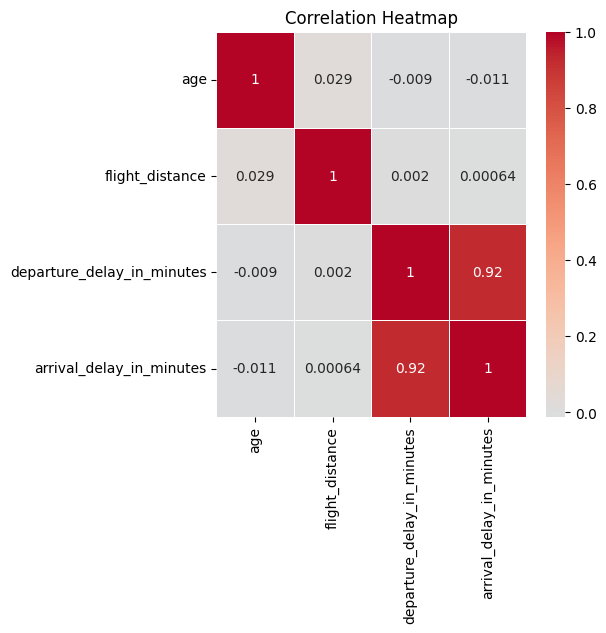

In [29]:
#made a new dataframe of all discrete numeric columns for calculation of correlation between them
new_df = df[a] 
correlation_matrix = new_df.corr()

# 25.Create a heatmap using Seaborn for correlation calculation between all 'Discrete Numeric' columns
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='departure_delay_in_minutes', ylabel='arrival_delay_in_minutes'>

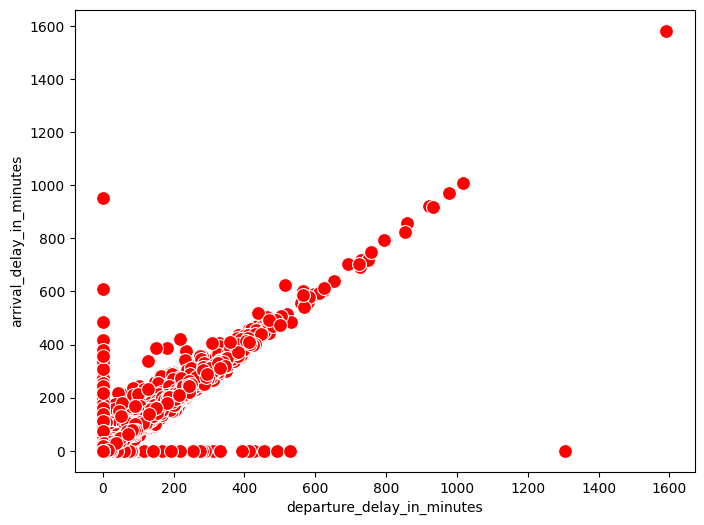

In [30]:
# 26.Plotting scatter plot between 'departure_delay_in_minutes' and 'arrival_delay_in_minutes' to observe their relation with each other
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['departure_delay_in_minutes'], y=df['arrival_delay_in_minutes'], marker='o', color='red', s=100)

In [31]:
#from Correlation Heatmap we can conclude that the 'departure_delay_in_minutes' and 'arrival_delay_in_minutes'
# are Multicollinear and one needs to dropped 

df.drop(['arrival_delay_in_minutes'],axis=1,inplace=True)
#here we have dropped the 'arrival_delay_in_minutes'

<Axes: xlabel='flight_distance', ylabel='Count'>

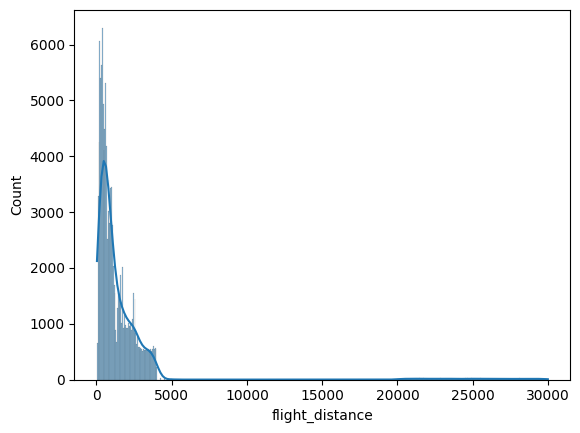

In [32]:
# 27.Plotting Histogram for 'flight_distance' column having discrete Numeric values

#from above graph we can observe the distribition of data which is Right Skewed
sns.histplot(data = df['flight_distance'], kde = True)

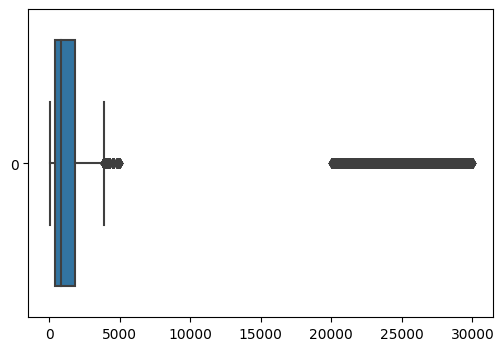

In [33]:
# 28.Box plot for detection of any ouliers in 'flight_distance'
plt.figure(figsize=(6,4))
sns.boxplot(df['flight_distance'],orient="h")
plt.show()

In [34]:
# Getting values of Quartile1(Q1) and Quartile3(Q3) for 'flight_distance' for detection of outliers
Q1 = df['flight_distance'].quantile(0.25)
Q2 = df['flight_distance'].quantile(0.5)
Q3 = df['flight_distance'].quantile(0.75)
Q1,Q2,Q3

(419.0, 861.0, 1815.0)

In [35]:
# calculating IQR value for 'flight_distance'
IQR = Q3 - Q1
IQR

1396.0

In [36]:
# calculation of upper_bound and lower_bound for outlier detection in 'flight_distance'
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
upper_bound , lower_bound

(3909.0, -1675.0)

In [37]:
# calculating total outliers (count of outliers) from 'flight_distance'
total_outlier_count = (df['flight_distance'] > upper_bound).sum()
total_outlier_count

3345

In [38]:
# As there are only 3345 number of outliers in the column, so instead of removing entire rows, 
# we can change values of outliers from 'flight_distance' column to it's upper_bound value
# As we do have only approx 1,26,000 rows of data, trying to keep as maximum as possible
# As with removal of entire row, we could have lost other important data associated with that column
index = df['flight_distance'] > upper_bound
df.loc[index, 'flight_distance'] = upper_bound

<Axes: xlabel='flight_distance', ylabel='Count'>

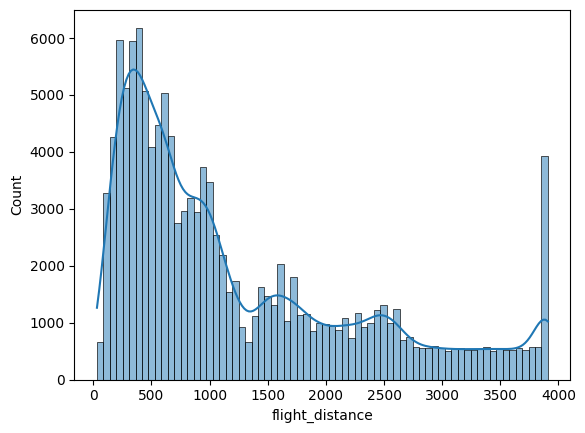

In [39]:
# The histogram of 'flight_distance' after capping all outliers value to 'upper_bound'
# we can observe the spike of values at far right right end (higher frequency bar), that is because of capping 
# all outlier values from 'flight_distance' column to upper_bound
sns.histplot(data = df['flight_distance'], kde = True)

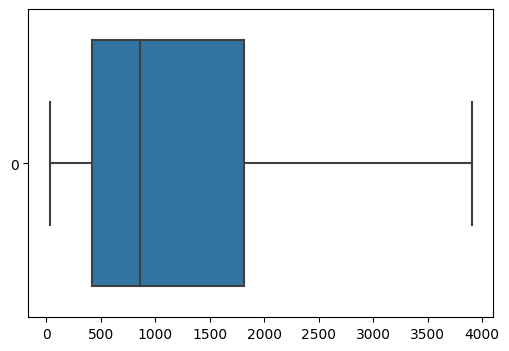

In [40]:
# box plot after removal of all outliers from 'flight_distance'
plt.figure(figsize=(6,4))
sns.boxplot(df['flight_distance'],orient="h")
plt.show()

<Axes: xlabel='departure_delay_in_minutes', ylabel='Density'>

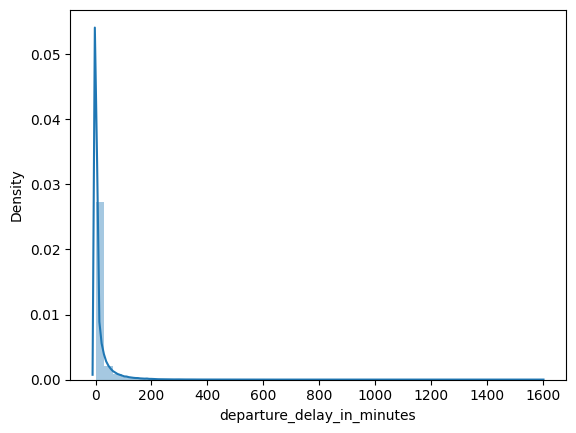

In [41]:
# 29.Plotting Histogram for 'flight_distance' column having discrete Numeric values

#from above graph we can observe the distribition of data which is Right Skewed
sns.distplot(df['departure_delay_in_minutes'])

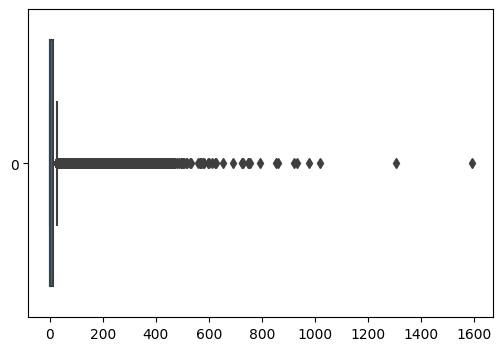

In [42]:
# 30.Box plot for detection of any ouliers in 'flight_distance'
plt.figure(figsize=(6,4))
sns.boxplot(df['departure_delay_in_minutes'],orient="h")
plt.show()

In [43]:
# Getting values of Quartile1(Q1) and Quartile3(Q3) for 'departure_delay_in_minutes' for detection of outliers

Q1 = df['departure_delay_in_minutes'].quantile(0.25)
Q2 = df['departure_delay_in_minutes'].quantile(0.5)
Q3 = df['departure_delay_in_minutes'].quantile(0.75)
Q1,Q2,Q3

(0.0, 0.0, 11.0)

In [44]:
# calculating IQR value for 'departure_delay_in_minutes'

IQR = Q3 - Q1
IQR

11.0

In [45]:
# calculation of upper_bound and lower_bound for outlier detection in 'departure_delay_in_minutes'

upper_bound2 = Q3 + (1.5*IQR)
lower_bound2 = Q1 - (1.5*IQR)
upper_bound2 , lower_bound2

(27.5, -16.5)

In [46]:
# calculating total outliers (count of outliers) from 'departure_delay_in_minutes'

total_outlier_count = (df['departure_delay_in_minutes'] > upper_bound2).sum()
total_outlier_count

18618

In [47]:
# There are 18618 number of outliers in the column, so instead of removing entire rows, 
# we can change values of outliers from 'departure_delay_in_minutes' column to it's upper_bound value
# As we do have only approx 1,26,000 rows of data, trying to keep as maximum as possible
# As with removal of entire row, we could have lost other important data associated with that column 

index = df['departure_delay_in_minutes'] > upper_bound2
df.loc[index, 'departure_delay_in_minutes'] = upper_bound2

<Axes: xlabel='departure_delay_in_minutes', ylabel='Density'>

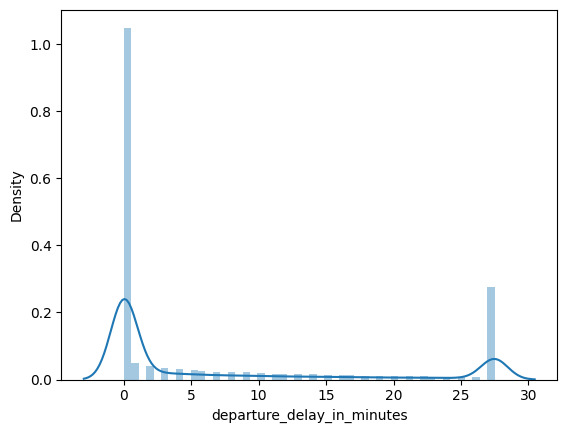

In [48]:
# The histogram of 'departure_delay_in_minutes' after capping all outliers value to 'upper_bound'
# we can observe the spike of values (higher frequency bar) at far right right end, that is because of capping 
# all outlier values from 'flight_distance' column to upper_bound

sns.distplot(df['departure_delay_in_minutes'])

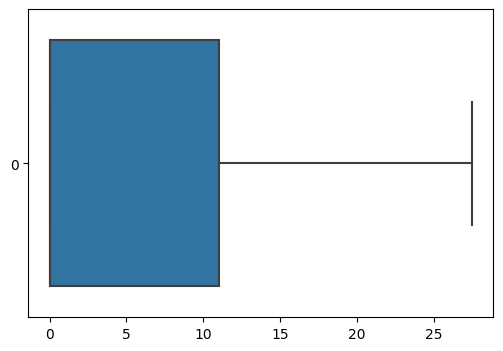

In [49]:
# box plot after removal of all outliers from 'departure_delay_in_minutes', so can infer no outliers present.

plt.figure(figsize=(6,4))
sns.boxplot(df['departure_delay_in_minutes'],orient="h")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

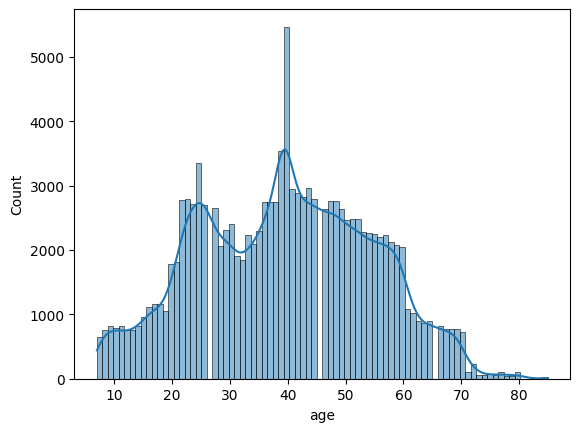

In [50]:
# 31.Plotting Histogram for 'age' column having discrete Numeric values
# from above graph we can observe the distribition of data which is almost normally distributed

sns.histplot(data = df['age'], kde = True)

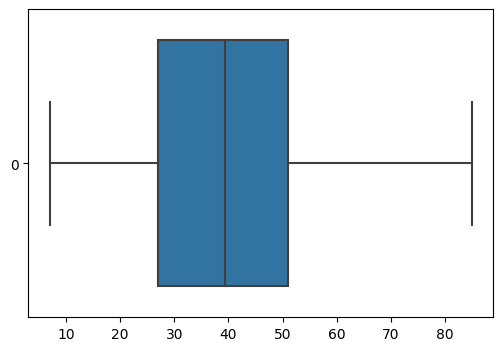

In [51]:
# 32.Box plot for detection of any ouliers in 'age'
# Can infer as there are no outliers in 'age' column

plt.figure(figsize=(6,4))
sns.boxplot(df['age'],orient="h")
plt.show()

In [52]:
# 33.Checking NUll value count for all columns

df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
satisfaction                         0
dtype: int64

In [53]:
# 34.Saving Clean data locally-for Insights with Visualisation with Tableau

df.to_csv('Clean_data.csv')

In [54]:
# No texual column or column with NULL values present in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126260 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             126260 non-null  int64  
 1   customer_type                      126260 non-null  int64  
 2   age                                126260 non-null  float64
 3   type_of_travel                     126260 non-null  int64  
 4   customer_class                     126260 non-null  int64  
 5   flight_distance                    126260 non-null  int64  
 6   inflight_wifi_service              126260 non-null  float64
 7   departure_arrival_time_convenient  126260 non-null  float64
 8   ease_of_online_booking             126260 non-null  float64
 9   gate_location                      126260 non-null  float64
 10  food_and_drink                     126260 non-null  float64
 11  online_boarding                    126260 no

In [55]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,1,0,13.0,1,1,460,3.0,4.0,3.0,1.0,5.0,3,5,5,4.0,3.0,4,4,5,5.0,25.0,0
1,1,1,25.0,0,0,235,3.0,2.0,3.0,3.0,1.0,3,1,1,1.0,5.0,3,1,4,1.0,1.0,0
2,0,0,26.0,0,0,1142,2.0,2.0,2.0,2.0,5.0,5,5,5,4.0,3.0,4,4,4,5.0,0.0,1
3,0,0,25.0,0,0,562,2.0,5.0,5.0,5.0,2.0,2,2,2,2.0,5.0,3,1,4,2.0,11.0,0
4,1,0,61.0,0,0,214,3.0,3.0,3.0,3.0,4.0,5,5,3,3.0,4.0,4,3,3,3.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,0,1,36.0,0,1,432,1.0,5.0,1.0,3.0,4.0,1,4,4,5.0,2.0,5,2,3,4.0,0.0,0
129876,1,0,23.0,0,0,646,4.0,4.0,4.0,4.0,4.0,4,4,4,4.0,5.0,5,5,5,4.0,0.0,1
129877,0,0,17.0,1,1,828,2.0,5.0,1.0,5.0,2.0,1,2,2,4.0,3.0,4,5,4,3.0,0.0,0
129878,1,0,14.0,0,0,1127,3.0,3.0,3.0,3.0,4.0,4,4,4,3.0,2.0,5,4,5,4.0,0.0,1


# **EDA-** 

<Axes: xlabel='Gender', ylabel='count'>

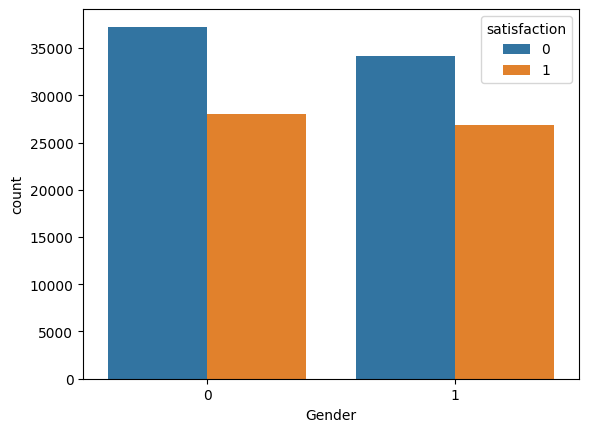

In [56]:
# From Bar chart, we can infer that the the Gender Column is balanced as having almost same proportion of males and females
# Even the ratio of proportion of 'Satisfaction' between both 'Male' and 'Female' is almost same.

# Legends- Gender: 'Male'-1 and 'Female'-0
# Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1

sns.countplot(x="Gender", hue="satisfaction", data=df)

<Axes: xlabel='customer_type', ylabel='count'>

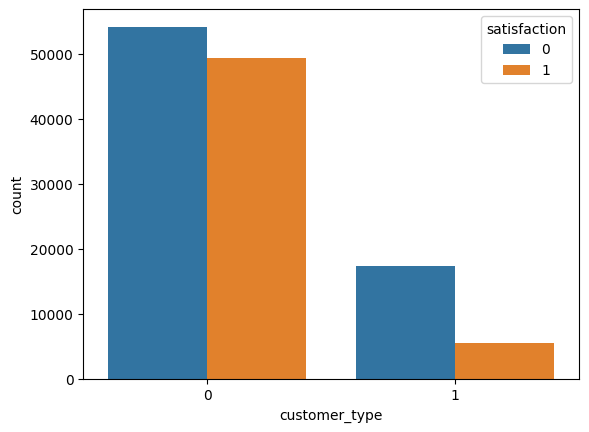

In [57]:
# From Bar chart, we can infer that the the Customer Type Column is having more proportition of 'Loyal Customers'
# From Satisfaction we can infer that, more proportion of Disloyal customers are not satisfied with the Service provided.

# Legends- Customer Type: 'Disloyal Customer'-1 and 'Loyal Customer'-0
# Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1

sns.countplot(x="customer_type", hue="satisfaction", data=df)

<Axes: xlabel='age', ylabel='Count'>

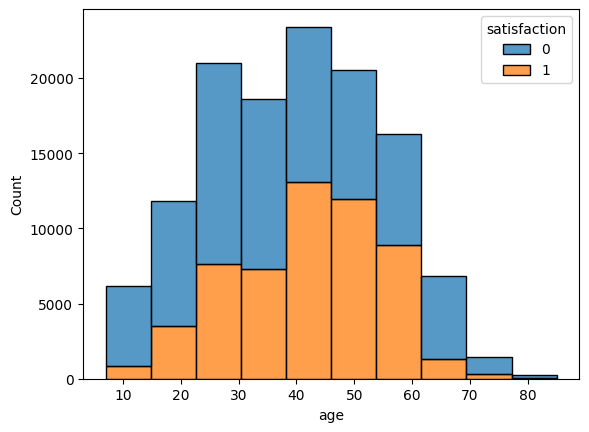

In [58]:
# Histogram is plotted for getting frequency of diff age group customers
# from the histogram of 'age' can infer that majority of customers belong to age group of 20-60
# Almost 50% population from every group is not satisfied with the Service provided

# Legends- Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1

sns.histplot(data=df, x="age", hue="satisfaction", multiple="stack",bins=10)

<Axes: xlabel='type_of_travel', ylabel='count'>

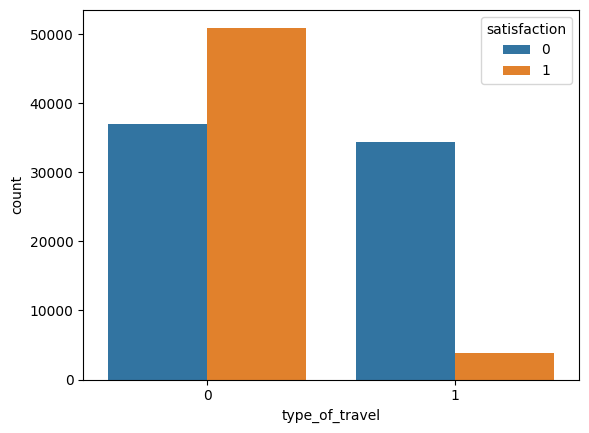

In [59]:
# From Bar chart, we can infer that the the 'type_of_travel' Column is having more proportition of customers having related travel 'Business' 
# From Satisfaction we can infer that, almost all customers having 'Personal Travel' are not satisfied with the Service provided.

# Legends- type_of_travel: 'Personal Travel'-1 and 'Business Travel'-0
# Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1

sns.countplot(x="type_of_travel", hue="satisfaction", data=df)

<Axes: xlabel='customer_class', ylabel='count'>

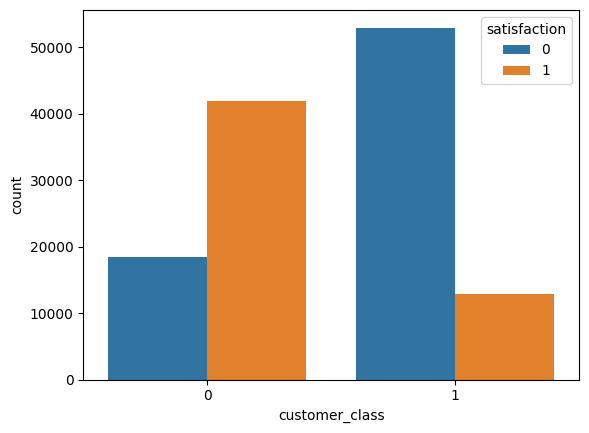

In [60]:
# From Bar chart, we can infer that the the 'customer_class' Column is balanced one having proportition of people travelling from 'Economy' and 'Business' class is same  
# From Satisfaction we can infer that, very few people from Economy class are actually satisfied

# Legends- customer_class: 'Economy'-1 and 'Business'-0
# Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1
sns.countplot(x="customer_class", hue="satisfaction", data=df)

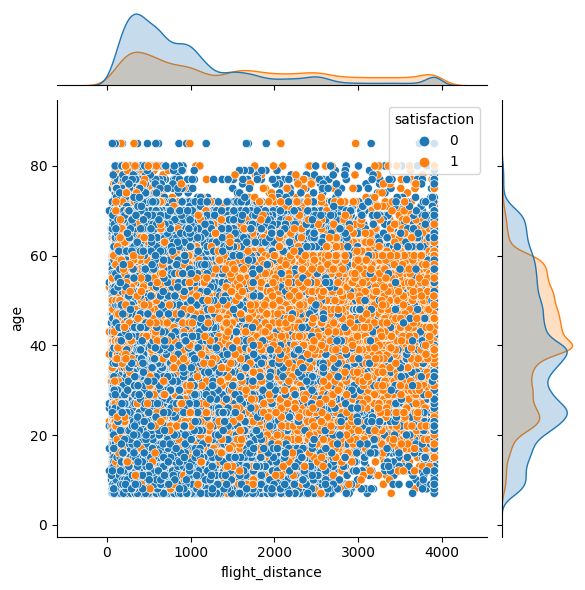

In [61]:
# Legends- Satisfaction: 'Not Satisfied'-0 and 'Satisfied'-1
# From scatter plot we can infer that the most people between age group of 40-60 having flight distance more than 1200kms are Satisfied with Services provided

sns.jointplot(x=df["flight_distance"], y=df["age"],hue=df['satisfaction'])


<Axes: xlabel='inflight_wifi_service', ylabel='count'>

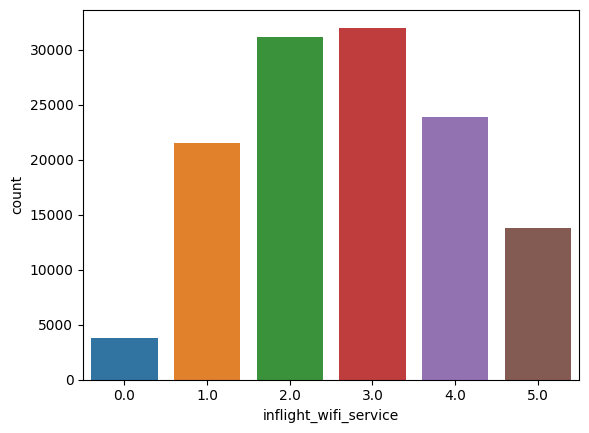

In [62]:
# Rating for the 'inflight_wifi_service' on scale of 0-5
# From the Bar Chart we can infer that most of customers have rated 'inflight_wifi_service' as 3 or below it.

sns.countplot(x="inflight_wifi_service", data=df)

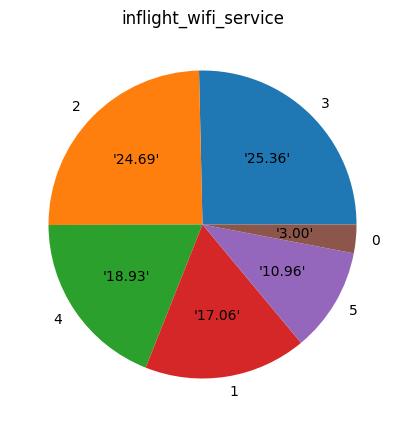

In [63]:
plt.figure(figsize=(8,5))
plt.title('inflight_wifi_service')
plt.pie(df['inflight_wifi_service'].value_counts(),labels=["3",'2','4','1','5','0'],autopct="'%.2f'")
plt.show()

<Axes: xlabel='ease_of_online_booking', ylabel='count'>

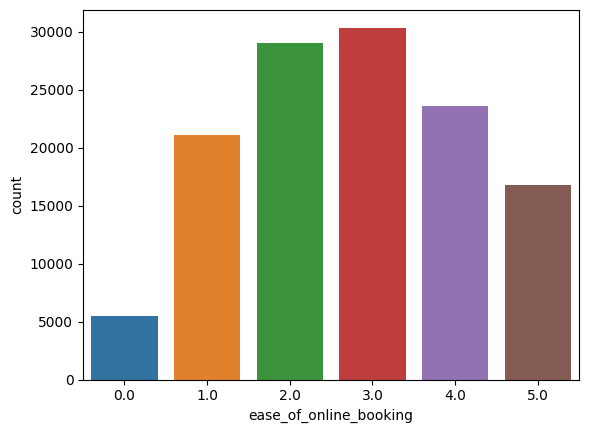

In [64]:
# Rating for the 'ease_of_online_booking' on scale of 0-5
# From the Bar Chart we can infer that most of customers have rated 'ease_of_online_booking' as 3 or below it.

sns.countplot(x="ease_of_online_booking", data=df)

<Axes: xlabel='gate_location', ylabel='count'>

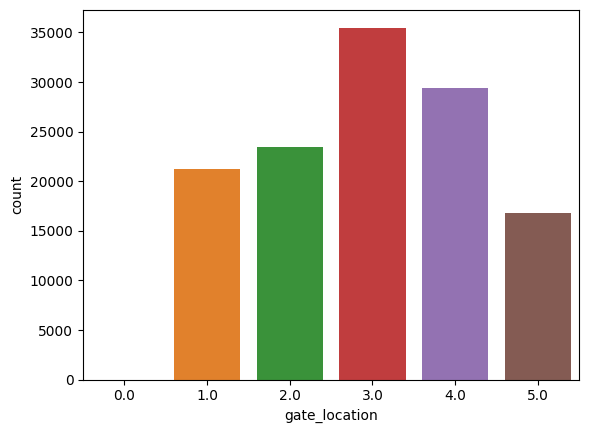

In [65]:
# Rating for the 'gate_location' on scale of 0-5
# From the Bar Chart we can infer that most of customers have rated 'gate_location' as 3 or below it.

sns.countplot(x="gate_location", data=df)

<Axes: xlabel='food_and_drink', ylabel='count'>

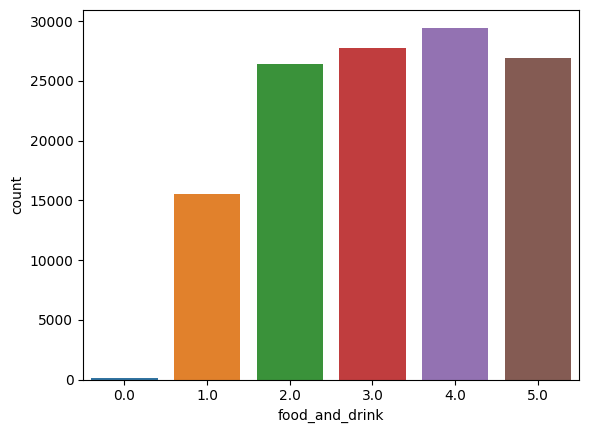

In [66]:
# Rating for the 'food_and_drink' on scale of 0-5
# From the Bar Chart we can infer that more customers have rated 'food_and_drink' as 3 or below it.

sns.countplot(x="food_and_drink", data=df)

<Axes: xlabel='online_boarding', ylabel='count'>

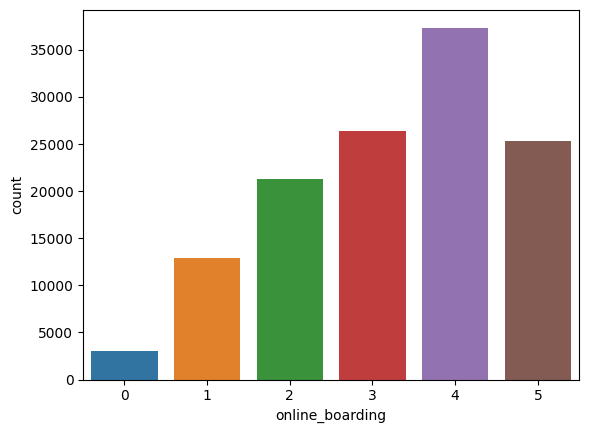

In [67]:
# Rating for the 'online_boarding' on scale of 0-5
# From the Bar Chart we can infer that customers have rated 'online_boarding' as balanced one.

sns.countplot(x="online_boarding", data=df)

<Axes: xlabel='seat_comfort', ylabel='count'>

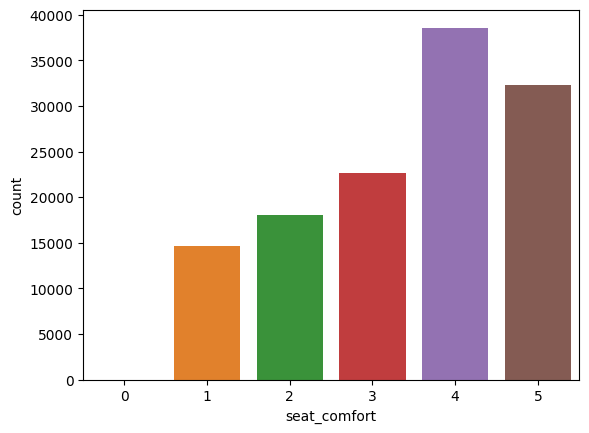

In [68]:
# Rating for the 'seat_comfort' on scale of 0-5 considering satisfaction column
# The rating for 'seat_comfort' is more tailed towards 4 or 5.

sns.countplot(x="seat_comfort",data=df)

<Axes: xlabel='inflight_entertainment', ylabel='count'>

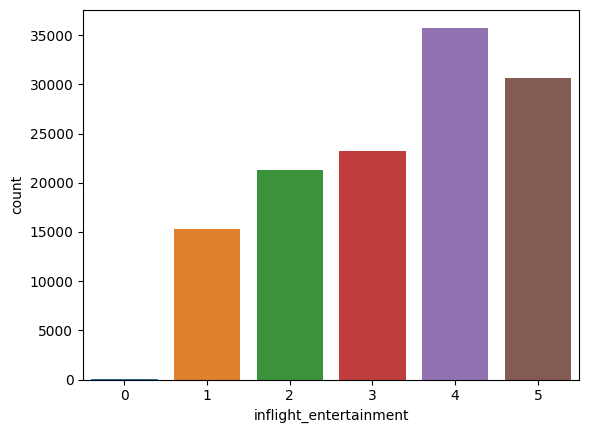

In [69]:
# Rating for the 'inflight_entertainment' on scale of 0-5 
# The rating for 'inflight_entertainment' is more tailed towards 4 or 5.

sns.countplot(x="inflight_entertainment", data=df)

<Axes: xlabel='onboard_service', ylabel='count'>

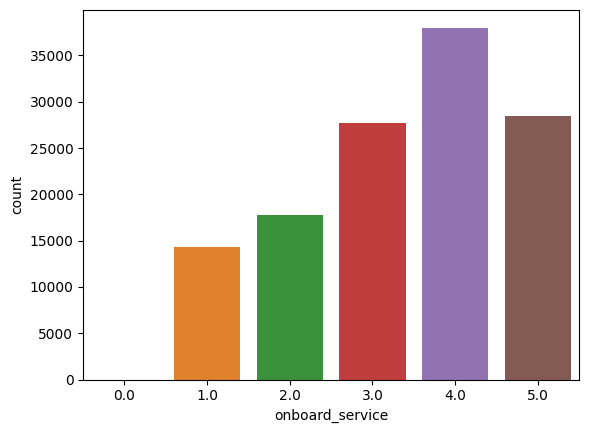

In [70]:
# Rating for the 'onboard_service' on scale of 0-5 
# The rating for 'onboard_service' is more tailed towards 4 or 5.

sns.countplot(x="onboard_service", data=df)

<Axes: xlabel='leg_room_service', ylabel='count'>

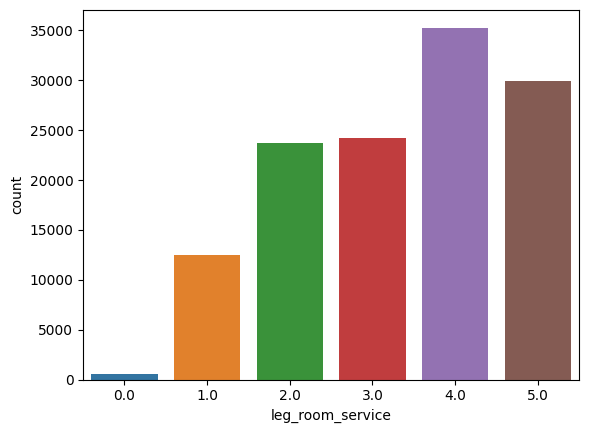

In [71]:
# Rating for the 'leg_room_service' on scale of 0-5 
# The rating for 'leg_room_service' is balanced one.

sns.countplot(x="leg_room_service", data=df)

<Axes: xlabel='baggage_handling', ylabel='count'>

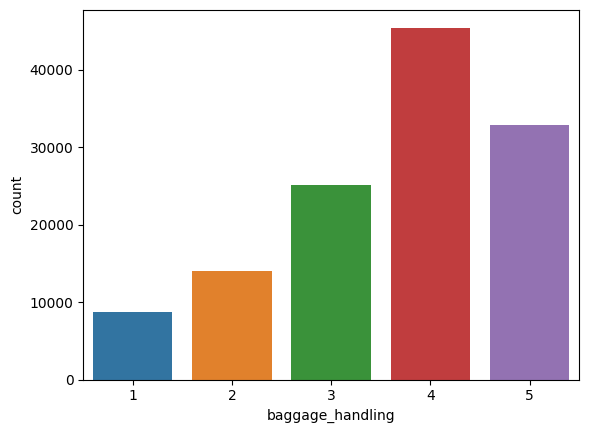

In [72]:
# Rating for the 'baggage_handling' on scale of 0-5 
# The rating for 'baggage_handling' is tailed towards 4 or 5.

sns.countplot(x="baggage_handling", data=df)

<Axes: xlabel='checkin_service', ylabel='count'>

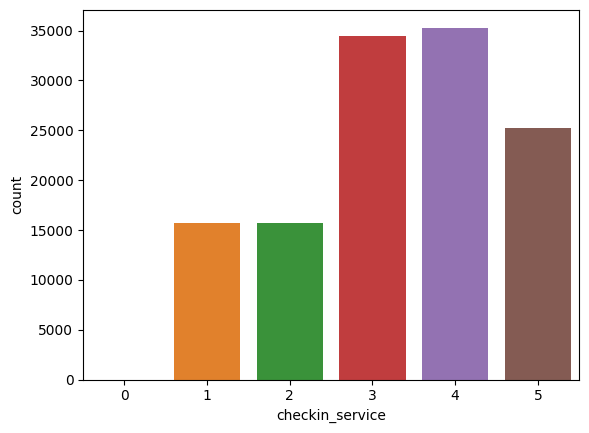

In [73]:
# Rating for the 'checkin_service' on scale of 0-5 
# The rating for 'checkin_service' is balanced one.

sns.countplot(x="checkin_service", data=df)

<Axes: xlabel='inflight_service', ylabel='count'>

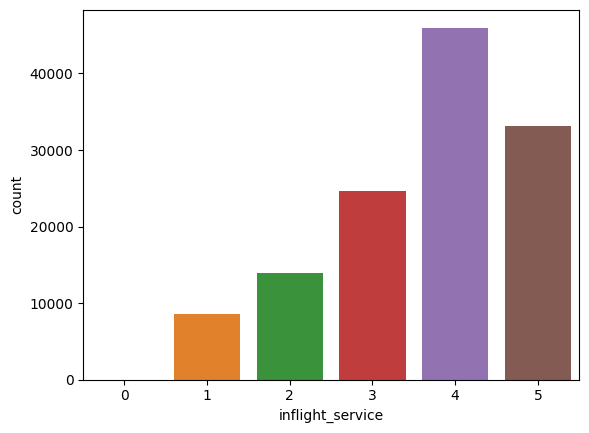

In [74]:
# Rating for the 'inflight_service' on scale of 0-5 
# The rating for 'inflight_service' is tailed towards 4 or 5.

sns.countplot(x="inflight_service", data=df)

<Axes: xlabel='cleanliness', ylabel='count'>

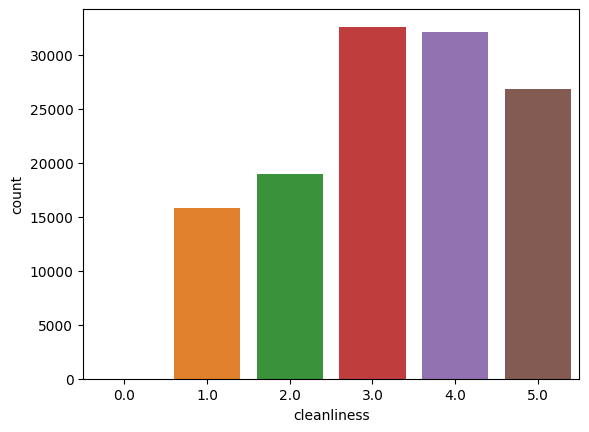

In [75]:
# Rating for the 'cleanliness' on scale of 0-5 
# The rating for 'cleanliness' is balanced one (having almost same proportition of ratings below and equal or above 4).

sns.countplot(x="cleanliness", data=df)

<Axes: xlabel='satisfaction', ylabel='count'>

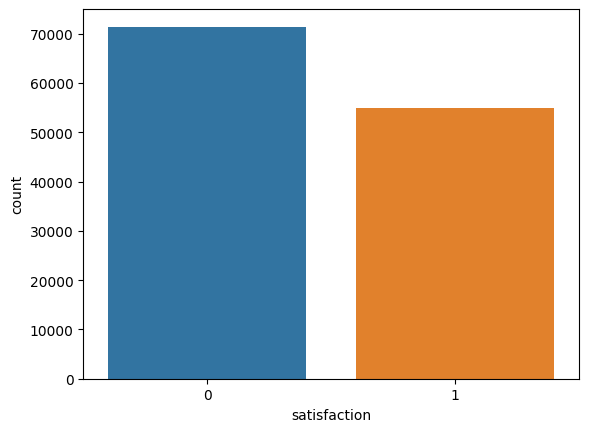

In [76]:
# This is dependent column (Y) having almost balanced proportition of both categories 

sns.countplot(x="satisfaction", data=df)

# **Feature Selection** 

In [77]:
y = df['satisfaction']
x = df.drop('satisfaction', axis=1)

In [78]:
y

0         0
1         0
2         1
3         0
4         1
         ..
129874    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 126260, dtype: int64

In [79]:
from sklearn.feature_selection import SelectKBest,chi2

best_features = SelectKBest(score_func=chi2,k = 5)
best_features.fit(x,y)

df_chi2 = pd.DataFrame({'Feature':x.columns,"Chi_Square":best_features.scores_})
df_chi2.sort_values('Chi_Square',ascending=False)

,Feature,Chi_Square
5,flight_distance,8.700384e+06
11,online_boarding,1.782475e+04
3,type_of_travel,1.730813e+04
4,customer_class,1.522484e+04
2,age,1.268687e+04
20,departure_delay_in_minutes,1.089285e+04
13,inflight_entertainment,1.059306e+04
12,seat_comfort,7.777945e+03
6,inflight_wifi_service,6.488337e+03
14,onboard_service,6.358700e+03


In [80]:
from scipy.stats import chi2_contingency
col_list_dropped=[]
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for each independent variable and the dependent variable
dependent_variable = 'satisfaction'  # Replace with your dependent variable's name
cramer_vs = {}
for col in x.columns:
    cramer_vs[col] = cramers_v(x[col], y)

# Sort the results to see the impact of each independent variable
sorted_cramer_vs = sorted(cramer_vs.items(), key=lambda x: x[1], reverse=True)
sum = 0
for col, cramer_v in sorted_cramer_vs:
    print(f"{col}: {cramer_v}")
    if cramer_v<0.29:
        col_list_dropped.append(col) #Selecting columns to be dropped with threshold 0.25
    sum = sum + cramer_v
cramer_v/len(sorted_cramer_vs)

online_boarding: 0.6174169482548951
inflight_wifi_service: 0.5226651034064176
customer_class: 0.5020325077592858
type_of_travel: 0.44367973632265456
inflight_entertainment: 0.42115395165001057
seat_comfort: 0.3879871068269583
leg_room_service: 0.3409129684925872
onboard_service: 0.33133372677690515
flight_distance: 0.3284809917793096
ease_of_online_booking: 0.3129664944793278
cleanliness: 0.31107216746276733
age: 0.29020950330170586
baggage_handling: 0.28889898804195013
inflight_service: 0.2826473846634007
checkin_service: 0.2501200001635761
food_and_drink: 0.22382886777976066
customer_type: 0.18396453788920913
gate_location: 0.1514519889867554
departure_delay_in_minutes: 0.07391507108137642
departure_arrival_time_convenient: 0.06726941794585525
Gender: 0.01041547893163494


0.0004959751872207114

In [81]:
from sklearn.feature_selection import mutual_info_classif
array = mutual_info_classif(x,y)
series1 = pd.Series(array)
series1

0     0.010439
1     0.020261
2     0.044102
3     0.116257
4     0.146702
5     0.059724
6     0.164388
7     0.006433
8     0.051845
9     0.015060
10    0.029778
11    0.214132
12    0.082520
13    0.096404
14    0.057789
15    0.061525
16    0.047832
17    0.034915
18    0.045656
19    0.052836
20    0.003759
dtype: float64

<Axes: >

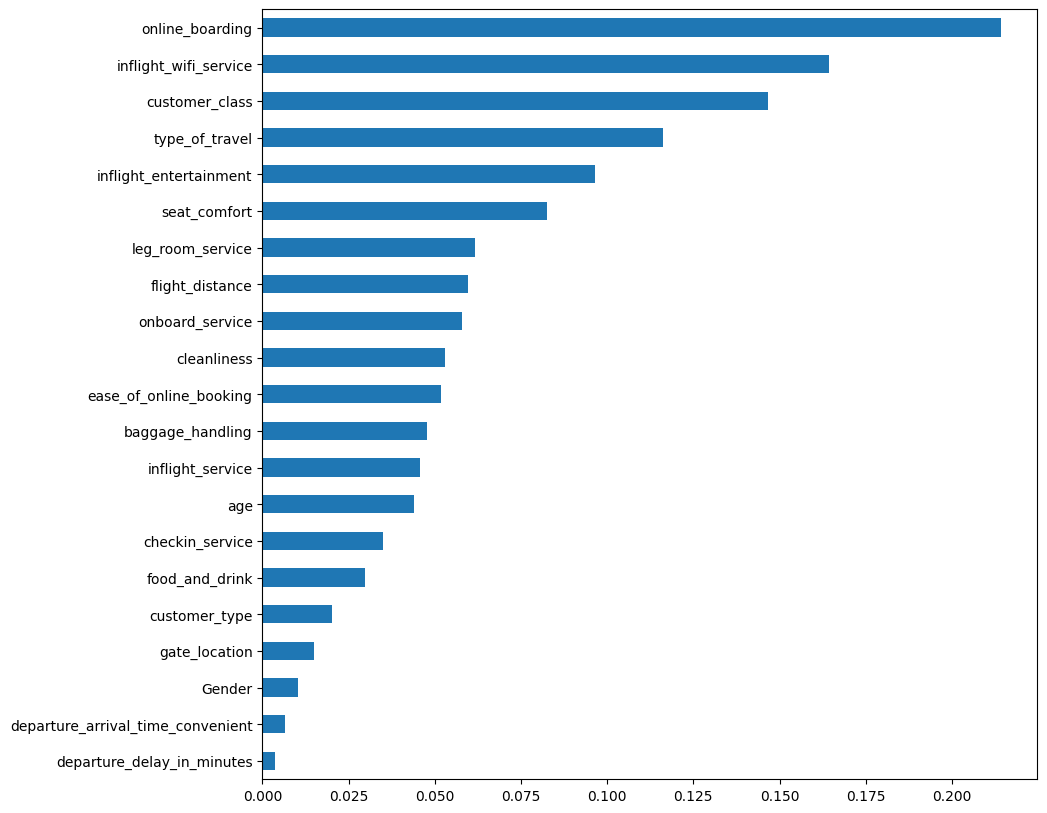

In [82]:
series1.index = x.columns
series1.sort_values(ascending=True).plot(kind = 'barh',figsize=(10,10))

In [83]:
print(col_list_dropped)
for val in col_list_dropped:
    x.drop([val],axis=1,inplace=True)

['baggage_handling', 'inflight_service', 'checkin_service', 'food_and_drink', 'customer_type', 'gate_location', 'departure_delay_in_minutes', 'departure_arrival_time_convenient', 'Gender']


In [84]:
df['satisfaction'].value_counts()

satisfaction
0    71425
1    54835
Name: count, dtype: int64

# **Model Building** 

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((101008, 12), (25252, 12), (101008,), (25252,))

In [86]:
def create_model_lg():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model

In [87]:
def create_model_svm():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    return model

In [88]:
def create_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(x_train, y_train)
    return model

In [89]:
def create_model_rf():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=20, max_depth=5)
    model.fit(x_train, y_train)
    return model

In [90]:
def create_model_ada():
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [91]:
model_lg = create_model_lg()

In [92]:
model_svm = create_model_svm()

In [93]:
model_dt = create_model_dt()

In [94]:
model_rf = create_model_rf()

In [95]:
model_ada = create_model_ada()

In [96]:
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    y_true = y_test
    y_pred = model.predict(x_test)
    
    accuracy = f"{accuracy_score(y_true, y_pred):0.2f}"
    precision = f"{precision_score(y_true, y_pred):0.2f}"
    recall = f"{recall_score(y_true, y_pred):0.2f}"
    f1 = f"{f1_score(y_true, y_pred):0.2f}"
    
    return accuracy, precision, recall, f1

In [97]:
models = [
    {"name": "LG", "model": model_lg},
    {"name": "SVM", "model": model_svm},
    {"name": "DT", "model": model_dt},
    {"name": "RF", "model": model_rf},
    {"name": "Ada", "model": model_ada}
]

print('-' * 72)
print(f"|{'Algo':^10}|{'Accuracy':^15}|{'Precision':^15}|{'Recall':^15}|{'F1':^10}|")
print('-' * 72)
for model_info in models:
    evaluation = evaluate_model(model_info['model'])
    print(f"|{model_info['name']:^10}|{evaluation[0]:^15}|{evaluation[1]:^15}|{evaluation[2]:^15}|{evaluation[3]:^10}|")
    
print('-' * 72)

------------------------------------------------------------------------
|   Algo   |   Accuracy    |   Precision   |    Recall     |    F1    |
------------------------------------------------------------------------
|    LG    |     0.86      |     0.85      |     0.82      |   0.83   |
|   SVM    |     0.66      |     0.66      |     0.46      |   0.54   |
|    DT    |     0.90      |     0.92      |     0.85      |   0.88   |
|    RF    |     0.92      |     0.91      |     0.92      |   0.91   |
|   Ada    |     0.91      |     0.91      |     0.89      |   0.90   |
------------------------------------------------------------------------


# **PICKLING MODEL FILE**

In [98]:
# Selecting Random Forest for the model Building
import pickle
with open('model_rf.pickle','wb') as file:
    pickle.dump(model_rf,file)